In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Below code is just to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [34]:
df= pd.read_csv("uber.csv")

In [35]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
df = df.drop(columns=['key','Unnamed: 0']) # useless column

In [37]:
df.shape

(200000, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [39]:
# formate of pickup_datetime should be datetime but currently its object
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [40]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [41]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [42]:
# drop rows contain null values 
df.dropna(inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4705e4e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4705e5090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4705e4cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4705e5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4705e5450>],
 'means': []}

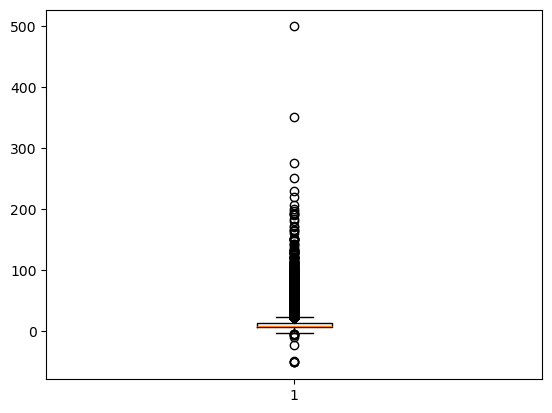

In [43]:
# Identify outliers 
plt.boxplot(df['fare_amount'])

In [44]:
# remove outliers 
low = df['fare_amount'].quantile(0.01)
high = df['fare_amount'].quantile(0.99)

df = df[(df['fare_amount']<high) & (df['fare_amount']>low)]

In [45]:
df.select_dtypes(include=[np.number]).corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_longitude,0.006534,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.004843,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,0.006012,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,-0.007651,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.012145,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


In [46]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [47]:
x = df.drop(['fare_amount'], axis =1 )
y= df['fare_amount']

In [48]:
x['pickup_datetime']= pd.to_datetime(x['pickup_datetime']).astype('int64')

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
liner_model = LinearRegression()
liner_model.fit(x_train,y_train)

prediction = liner_model.predict(x_test)

r2score = r2_score(y_test, prediction)
rsmeScore = np.sqrt(mean_squared_error(y_test, prediction))
print("Linear regression RSME: ",rsmeScore," R2 ",r2score)

Linear regression RSME:  8.068305330362852  R2  0.010558427860487773


In [51]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("RF R²:", r2_score(y_test, rf_pred))

RF RMSE: 3.4562098287581673
RF R²: 0.8184376875025858


In [52]:
'''
Linear Regression still performed very poorly while Random Forest performed very well.
Reason: The Uber Fare Problem is NOT Linear
Uber fare depends on:

Distance (nonlinear relation — short trips have base fare)
Time of day (rush hour surcharge)
Day of week / month
Traffic patterns
Airport trips have fixed pricing spikes
Manhattan geography (lat/lon → highly nonlinear)

That’s not linear at all.

Why Random Forest Works Better

Random Forest:

Handles non-linear relationships
Handles interactions between features
Handles outliers better
Automatically learns distance rules + time patterns
Doesn't assume a straight line
'''

"\nLinear Regression still performed very poorly while Random Forest performed very well.\nReason: The Uber Fare Problem is NOT Linear\nUber fare depends on:\n\nDistance (nonlinear relation — short trips have base fare)\nTime of day (rush hour surcharge)\nDay of week / month\nTraffic patterns\nAirport trips have fixed pricing spikes\nManhattan geography (lat/lon → highly nonlinear)\n\nThat’s not linear at all.\n\nWhy Random Forest Works Better\n\nRandom Forest:\n\nHandles non-linear relationships\nHandles interactions between features\nHandles outliers better\nAutomatically learns distance rules + time patterns\nDoesn't assume a straight line\n"